### Import libraries

In [18]:
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from utils import get_X_y, get_test
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [19]:
from sklearn.metrics import roc_auc_score
def get_metrics(y_pred, y_targ, y_prob):
    auc = roc_auc_score(y_targ, y_prob)
    num = get_num(y_pred, y_targ)
    asy1 = get_ASY(y_pred, y_targ, p=[-9, 9, 1, 0])
    asy2 = get_ASY(y_pred, y_targ, p=[-1, 3, 2, -1])
    return auc, num, asy1, asy2
def get_num(y_pred, y_targ):
    return np.sum(y_pred != y_targ)
def get_ASY(y_pred, y_targ, p=[-1, 1, 1, -1]):
    TP = np.sum((y_pred == 1) & (y_targ == 1))
    FP = np.sum((y_pred == 1) & (y_targ == 0))
    FN = np.sum((y_pred == 0) & (y_targ == 1))
    TN = np.sum((y_pred == 0) & (y_targ == 0))
    return p[0]*TP + p[1]*FP + p[2]*FN + p[3]*TN

### Dataset 14

In [20]:
X, y = get_X_y(14, False)
X_test = get_test(14)

In [4]:
np.sum(y.values)/len(y)

0.20839

In [5]:
X.describe()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
count,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,...,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000
mean,10.883864,-5.634143,4.235114,-19.141450,-0.255440,5.422131,13.601823,-2.730558,0.815511,-3.908026,...,-0.074959,34.872973,-9.383720,3.417541,-11.426440,4.221277,2.074694,-5.511390,-2.243133,18.786366
std,7487.415331,5283.711292,9754.894978,7740.165439,7241.179879,6712.661088,4368.345593,1567.162859,1671.193184,9900.168091,...,142.657307,9759.442607,7695.800604,3731.393669,3813.845964,5236.335598,9326.848651,2819.185772,1379.576411,6393.442642
min,-40577.111436,-25930.091510,-43845.150915,-38256.035233,-34983.638772,-29152.046563,-19924.870272,-7281.272489,-7820.780582,-44698.680482,...,-652.151454,-44710.704820,-35593.630004,-17293.477095,-18508.909863,-23365.158615,-45434.843446,-12374.707626,-6573.855039,-29242.015655
25%,-5033.495409,-3586.999579,-6585.023110,-5233.500313,-4883.100248,-4526.015864,-2931.435252,-1059.958677,-1131.018755,-6688.892419,...,-96.368035,-6557.482958,-5176.705121,-2509.251232,-2585.473520,-3524.115321,-6297.926872,-1905.623648,-934.083996,-4293.628507
50%,11.702738,2.051890,11.122119,-17.041872,-1.223470,-1.500655,19.715002,-3.596025,-3.773523,12.552235,...,-0.009500,45.616102,-27.803865,2.280013,-3.939865,1.880169,-3.482060,-5.823801,-0.557650,25.173427
75%,5086.674644,3542.209651,6592.491277,5191.726183,4883.540542,4533.469545,2962.585447,1053.395165,1126.861912,6672.895706,...,96.484443,6629.908528,5177.250009,2507.542470,2550.822443,3533.062662,6298.082270,1893.252903,927.519003,4332.136052
max,35535.264395,24313.930297,42349.466275,33404.055777,32048.450682,37208.506485,18737.653157,8048.057114,7550.291949,46616.271035,...,689.498007,45583.309066,34634.650893,15774.533029,18192.916611,23656.171489,45838.175871,12862.485518,5931.061710,29092.241862


In [ ]:
#Видно, что присутствуют выбросы, попробуем убрать их по правилу трех и двух сигм
def remove_blowout(X, col, alpha = 0.05):
    thress = (X[col].quantile(0.5*alpha), X[col].quantile(1-0.5*alpha))
    
    # Remove by 5 percent percentile
    col_vals = X[col].values
    mask = X[col].apply(lambda x: x<thress[1] and x>thress[0]).values
    
    col_filt_vals = col_vals[mask]
    
    # Get new 
    mu, std = norm.fit(col_filt_vals)
    new_thress = (mu-2*std, mu+2*std)
        
    new_mask = X[col].apply(lambda x: x<new_thress[1] and x>new_thress[0]).values
    return X.index.values[new_mask], X.index.values[np.isin(new_mask, [False])]

(924,)
(76,)


### Visaulize and get statistics from data

In [ ]:
data = X.copy()
data['answers'] = y.values
sns.heatmap(data.corr(), cmap="viridis")
plt.savefig('img/14_corr.jpg')

In [ ]:
print(f'X shape = {X.shape}', f'0 = {int(len(y) - y.sum(axis=0)[0])}', f'1 = {int(y.sum(axis=0)[0])}')
sns.heatmap(X.corr(), cmap="viridis")
import matplotlib.pyplot as plt
plt.savefig('img/14_corr_no_answer.jpg')

In [12]:
from scipy.stats import shapiro
from scipy.stats import norm
def print_shapiro(df):
    for col in df.columns:
        x = df[col].values
        shapiro_p = shapiro(x)[0]
        mu, std = norm.fit(x)
        print(f"P_val: {round(shapiro_p, 3)}, N({round(mu, 2)}, {round(std, 2)})")

def print_KLdiv(df, y):
    kulback = []
    mask0 = ((y==0).values)[:, 0]
    mask1 = ((y==1).values)[:, 0]
    for col in df.columns:
        x0 = df[col][mask0].values
        x1 = df[col][mask1].values
        shapiro_p0 = shapiro(x0)[0]
        shapiro_p1 = shapiro(x1)[0]
        mu0, std0 = norm.fit(x0)
        mu1, std1 = norm.fit(x1)
        kl = np.log(std1/std0) + (std0**2 + (mu0 - mu1)**2)/(2 * std1**2) - 0.5
        print(f"KL_div: {round(kl, 3)}, Shapiro_ps: ({round(shapiro_p0, 3)}, {round(shapiro_p1, 3)}), N({round(mu0, 3)}, {round(std0, 3)}), N({round(mu1, 3)}, {round(std1, 3)})")
        kulback.append(kl)
    return kulback

In [32]:
np.sum(y.values)/len(y)

0.20839

In [33]:
X.shape

(300000, 100)

In [11]:
from scipy.stats import norm
import numpy as np
import pandas as pd
def new_gen_feature(X, y, X_test, columns):
    mask0 = ((y==0).values)[:, 0]
    mask1 = ((y==1).values)[:, 0]

    new_df = pd.DataFrame()
    new_df_test = pd.DataFrame()
    kls, mu0s, std0s, mu1s, std1s = [], [], [], [], []
    
    for col in columns:
        x0 = X[col][mask0].values
        x1 = X[col][mask1].values
        
        mu0, std0 = norm.fit(x0)
        mu1, std1 = norm.fit(x1)
        kl = float(np.log(std1/std0) + (std0**2 + (mu0 - mu1)**2)/(2 * std1**2) - 0.5)
        kls.append(kl)
        mu0s.append(mu0)
        std0s.append(std0)
        mu1s.append(mu1)
        std1s.append(std1)
        
        new_feature = np.sign(mu1 - mu0)*X[col]
        new_feature_test = kl*np.sign(mu1 - mu0)*X_test[col]
        new_df = pd.concat([new_df, new_feature], axis=1)
        new_df_test = pd.concat([new_df_test, new_feature_test], axis=1)
    
    return new_df, new_df_test
new_df, new_df_test = new_gen_feature(X, y, X_test, [2, 31, 75, 84])

In [14]:
new_X = pd.DataFrame()
for col in [2, 31, 75, 84]:
    new_X = pd.concat([new_X, X[col]], axis=1)
new_X.shape

(300000, 4)

In [15]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

logregress = LogisticRegression()
scalar     = StandardScaler()
pipeline   = Pipeline([('transformer', scalar), ('estimator', logregress)])

print(np.mean(cross_val_score(pipeline, new_X.values, y.values[:, 0], scoring='roc_auc', cv=10)))

0.8470357722985906


In [ ]:
from sklearn.svm import SVC

svm_rbf = SVC(kernel='rbf', probability=True)
grid_search = GridSearchCV(svm_rbf, {'C': np.linspace(0.001, 100, 10)}, scoring='accuracy', refit=True)
grid_search.fit(new_X.values, y.values.ravel())
print(f'Best parameter C ={grid_search.best_params_["C"]} \nBest log_evidence = {grid_search.best_score_}')
svm_rbf = grid_search.best_estimator

In [16]:
print_shapiro(X)
print("Kullback–Leibler divergence after features extraction")
res = print_KLdiv(X, y)

/home/kreinin.mv/.pyenv/versions/3.11.3/envs/venv-main/lib/python3.11/site-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


P_val: 1.0, N(10.88, 7487.4)
P_val: 1.0, N(-5.63, 5283.7)
P_val: 1.0, N(4.24, 9754.88)
P_val: 1.0, N(-19.14, 7740.15)
P_val: 1.0, N(-0.26, 7241.17)
P_val: 1.0, N(5.42, 6712.65)
P_val: 1.0, N(13.6, 4368.34)
P_val: 1.0, N(-2.73, 1567.16)
P_val: 1.0, N(0.82, 1671.19)
P_val: 1.0, N(-3.91, 9900.15)
P_val: 1.0, N(7.29, 4186.87)
P_val: 1.0, N(-19.72, 8382.16)
P_val: 1.0, N(-11.64, 7005.36)
P_val: 1.0, N(1.53, 1450.85)
P_val: 1.0, N(-9.78, 4803.79)
P_val: 1.0, N(-13.41, 7852.11)
P_val: 1.0, N(-9.59, 2056.5)
P_val: 1.0, N(-1.97, 3467.22)
P_val: 1.0, N(-3.68, 3103.51)
P_val: 1.0, N(17.33, 9804.51)
P_val: 1.0, N(-0.62, 693.03)
P_val: 1.0, N(0.24, 1816.55)
P_val: 1.0, N(-21.54, 6025.9)
P_val: 1.0, N(7.92, 3357.1)
P_val: 1.0, N(13.05, 8225.6)
P_val: 1.0, N(1.86, 3346.21)
P_val: 1.0, N(-7.2, 8529.0)
P_val: 1.0, N(25.83, 9203.58)
P_val: 1.0, N(5.35, 7125.98)
P_val: 1.0, N(-23.31, 9971.28)
P_val: 1.0, N(-0.99, 853.22)
P_val: 1.0, N(13.61, 9188.71)
P_val: 1.0, N(0.01, 97.51)
P_val: 1.0, N(-1.75, 8132.1

In [17]:
top_kulback = df.columns[np.argsort(np.array(res))][::-1][:4]
top_kulback

NameError: name 'df' is not defined

In [33]:
df.columns[np.argsort(np.array(res))][::-1]

Index([31,  2, 75, 84, 78, 76, 67, 39, 60, 14, 11, 15, 71, 13, 40, 73, 82, 17,
        3, 53, 55, 25, 41, 69,  9, 98, 94, 36, 66, 51, 28,  5, 21, 85, 52, 49,
       48, 68, 44, 45, 58, 19, 35, 77, 42, 50, 18, 54, 80, 38, 29, 16, 24, 83,
        1, 10, 59, 86, 97, 57, 72, 12, 47, 46, 63, 43, 22, 65, 89,  6, 74, 96,
       93, 64,  7, 90, 70, 26, 61, 88, 37, 23, 34, 30,  0, 87, 33, 79, 56,  4,
       92, 91, 99, 20, 32,  8, 81, 62, 27, 95],
      dtype='int64')

In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_predict, StratifiedKFold
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import GaussianNB
from catboost import CatBoostClassifier

In [ ]:
model = CatBoostClassifier(verbose=False)
print(np.mean(cross_val_score(model, new_df.values, y.values[:, 0], scoring='roc_auc', cv=10)))

In [67]:
#freq = np.sum(y.values)/len(y)
nb = GaussianNB()
res = []
for i in range(1, len(top_kulback)+1):
    res_i = np.mean(cross_val_score(nb, df[top_kulback[:i]].values, y.values[:, 0], scoring='roc_auc', cv=10))
    res.append(res_i)

best_k = np.argmax(res)+1
print(best_k)

8


In [9]:
for i in range(1, len(top_kulback)+1):
    print(np.mean(cross_val_score(nb, df[top_kulback[:i]].values, y.values[:, 0], scoring='roc_auc', cv=10)))

NameError: name 'top_kulback' is not defined

In [38]:
df[top_kulback[:4]]

(300000, 100)

In [58]:
import matplotlib.pyplot as plt
from tqdm import tqdm
def threshold_func(X, y, model, n_splits=4):
    skf = StratifiedKFold(n_splits=n_splits)
    y_proba_pred = cross_val_predict(model, X, y, cv=skf, method='predict_proba')[:,1] # for class '1'
    thresholds = np.linspace(0, 1, 501)
    fig, axs = plt.subplots(ncols=3, figsize=(16, 4))
    nums, acy1s, acy2s = [], [], []
    for thres in tqdm(thresholds):
        y_pred = np.array([int(x>thres) for x in y_proba_pred])
        conf_mat = confusion_matrix(y, y_pred)

        num = np.sum([y_pred!=y])
        nums.append(num)
        
        acy1 = np.sum(np.array([[-9, 9], [1, 0]]) * conf_mat)
        acy1s.append(acy1)

        acy2 = np.sum(np.array([[-1, 3], [2, -1]]) * conf_mat)
        acy2s.append(acy2)
    
    loc_min = np.argmin(nums)
    if len(np.unique(acy1s[loc_min:])) == 1:
        loc_min = len(acy1s) - 1
    num_thres = thresholds[loc_min]
    axs[0].set_title('NUM = %d'% nums[loc_min])
    axs[0].plot(thresholds, nums, c='C0', lw=1.5)#, label='NUM, best_thres=%.2f'%num_thres)
    axs[0].scatter(thresholds[loc_min], nums[loc_min], c='C0', s=25)
    axs[0].set_xlabel('Threshold')
    axs[0].set_ylabel('NUM')
    axs[0].legend();
    
    loc_min = np.argmin(acy1s)
    if len(np.unique(acy1s[loc_min:])) == 1:
        loc_min = len(acy1s) - 1
    acy1_thres = thresholds[loc_min]
    axs[1].set_title('ASY1 = %d'% acy1s[loc_min])
    axs[1].plot(thresholds, acy1s, c='C1', lw=1.5)#, label='AY1, best_thres=%.2f'%acy1_thres)
    axs[1].scatter(thresholds[loc_min], acy1s[loc_min], c='C1', s=25)
    axs[1].set_xlabel('Threshold')
    axs[1].set_ylabel('ASY1')
    axs[1].legend();
    
    loc_min = np.argmin(acy2s)
    if len(np.unique(acy1s[loc_min:])) == 1:
        loc_min = len(acy2s) - 1
    acy2_thres = thresholds[loc_min]
    axs[2].set_title('ASY2 = %d'% acy2s[loc_min])
    axs[2].plot(thresholds, acy2s, c='C2', lw=1.5)#, label='ACY2, best_thres=%.2f'%acy2_thres)
    axs[2].scatter(thresholds[loc_min], acy2s[loc_min], c='C2', s=25)
    axs[2].set_xlabel('Threshold')
    axs[2].set_ylabel('ASY2')
    axs[2].legend();
    
    plt.savefig('img/14_thres.jpg')
    
    return num_thres, acy1_thres, acy2_thres

100%|██████████| 501/501 [02:12<00:00,  3.79it/s]
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


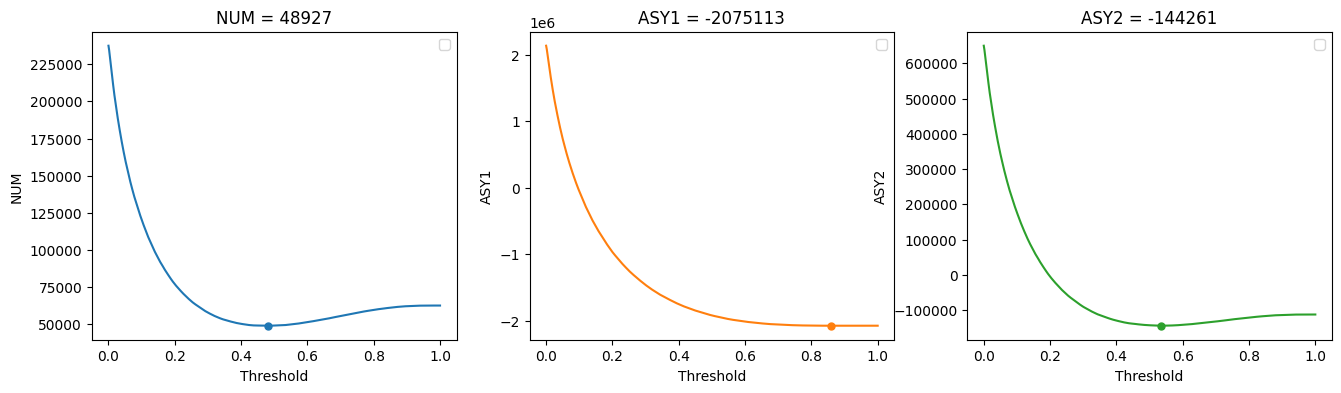

In [59]:
num_thres, acy1_thres, acy2_thres = threshold_func(df[top_kulback[:4]].values, y.values[:, 0], nb)

100%|██████████| 501/501 [02:12<00:00,  3.79it/s]
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
100%|██████████| 501/501 [02:11<00:00,  3.81it/s]
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored 

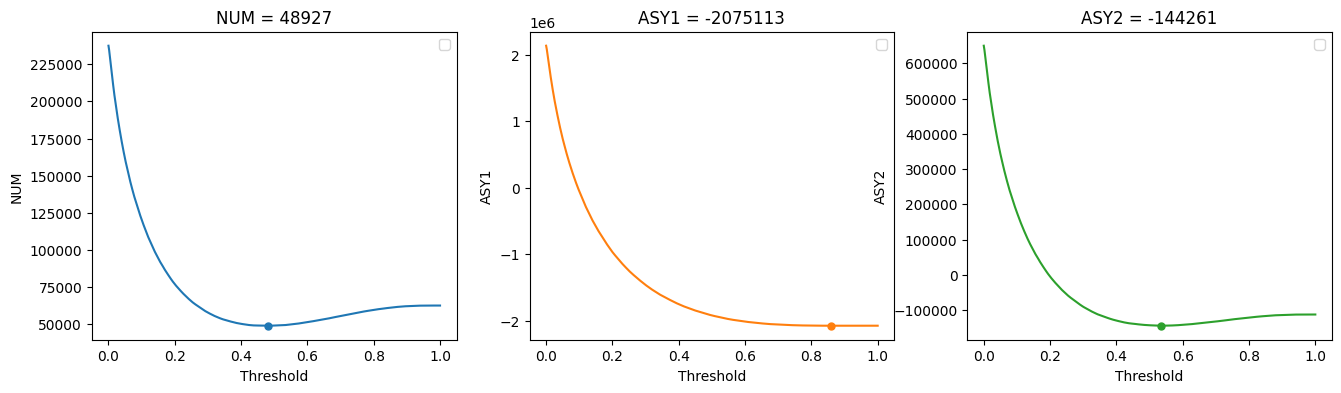

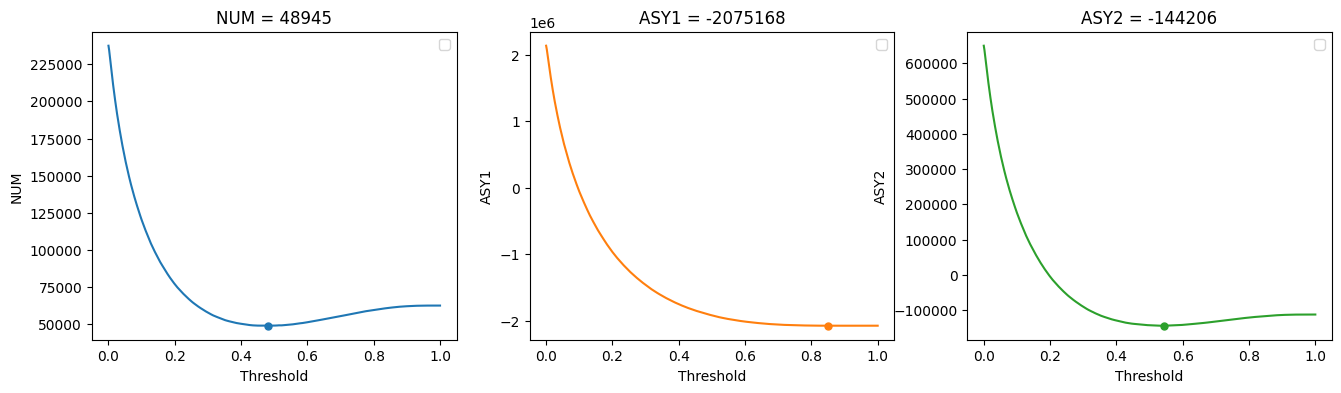

In [60]:
num_thres, acy1_thres, acy2_thres = threshold_func(df[top_kulback[:4]].values, y.values[:, 0], nb)

100%|██████████| 501/501 [02:12<00:00,  3.79it/s]
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


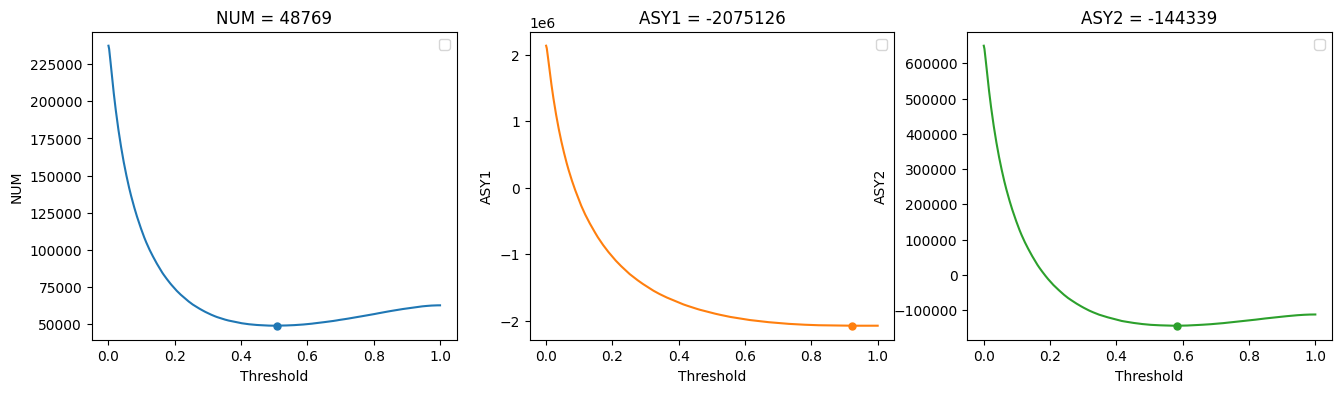

In [70]:
num_thres, acy1_thres, acy2_thres = threshold_func(df[top_kulback[:4]].values, y.values[:, 0], logregress)
#num_thres, acy1_thres, acy2_thres = threshold_func(df[top_kulback[:best_k]].values, y.values[:, 0], logregress)

### Final model
Был выбран logregression.

In [93]:
def get_test(num=1, to_numpy=False):
    X = pd.read_csv(f'./data/task1_{num}_learn_X.csv', header=None, sep=' ')
    if to_numpy:
        return X.to_numpy()
    return X
    
X_test = get_test(14)

In [94]:
logregress = LogisticRegression()
logregress.fit(df[top_kulback[:4]].values, y.values[:, 0])


LogisticRegression()

In [96]:
y_prob = logregress.predict_proba(X_test[top_kulback[:4]].values)
#y_prob[:, 1].shape

answer = pd.DataFrame(columns=['AUC', 'NUM', 'ASY1', 'ASY2'])
answer['AUC'] = y_prob[:, 1]
answer['NUM'] = (y_prob[:,1] > num_thres).astype(int)
answer['ASY1'] = (y_prob[:,1] > acy1_thres).astype(int)
answer['ASY2'] = (y_prob[:,1] > acy2_thres).astype(int)

In [98]:
answer.to_csv('./answers/task1_14_ans.csv', index=False)